
# DATA CLEANING IN PYTHON

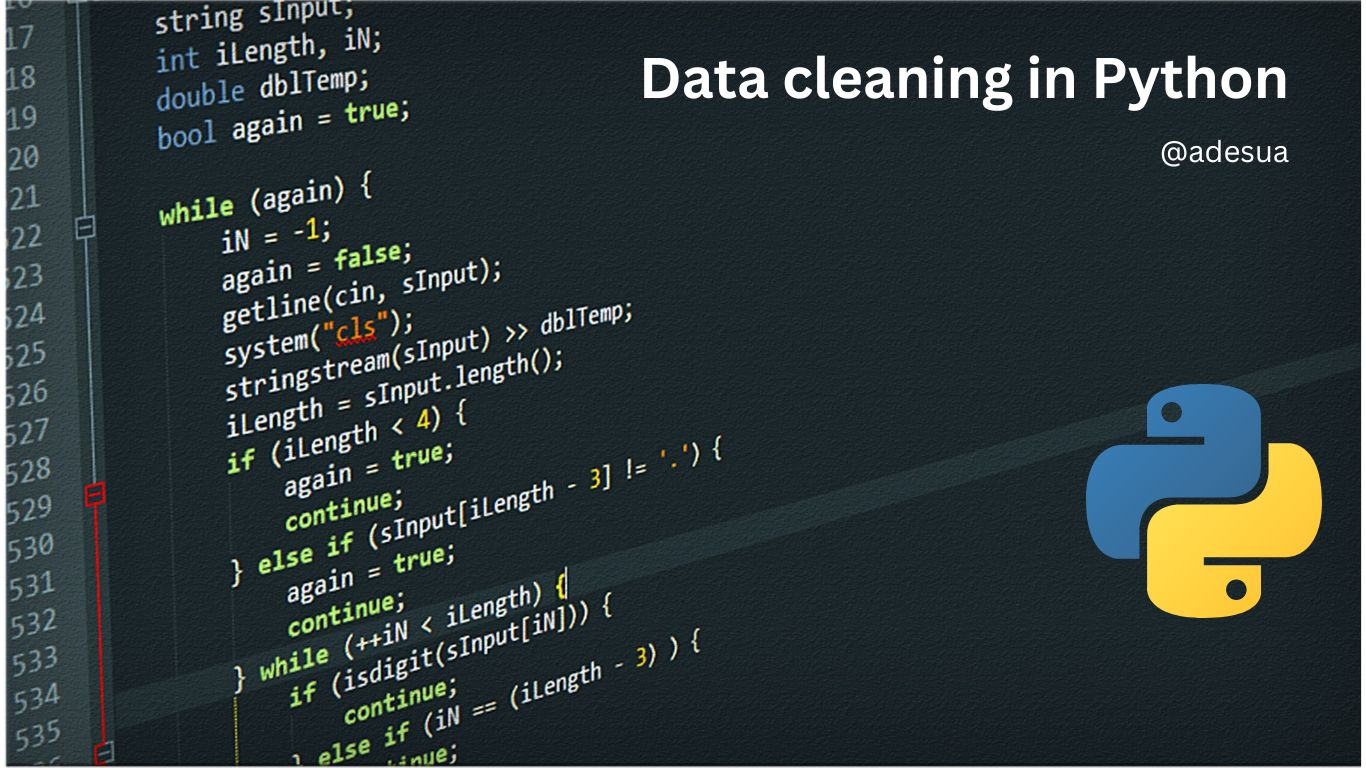

In [1]:
# import the necessary libraries 
import pandas as pd
import numpy as np
import re

In [2]:
job = pd.read_csv(r'C:\Users\user\Documents\projects\Python\job_data.csv')

In [3]:
job.head()

,Title,Company,Location,Salary,Job Type,Date Posted,Summary
0,Transportation Analyst,ExxonMobil,Lagos,NaN,NaN,PostedPosted 7 days ago,Intermediate proficiency with Tableau or other...
1,QA Tester - Intern,mDoc Healthcare,Lagos,"₦100,000 - ₦120,000 a month",Contract +1,EmployerActive 6 days ago,Advanced knowledge of data security and encryp...
2,Data Analyst - Healthcare,eMedicStore,Lagos,NaN,Full-time,EmployerActive 5 days ago,Implement new data analysis methodologies and ...
3,Data Analyst,GVA Partners,Lagos,NaN,Full-time,EmployerActive 5 days ago,Minimum of 3 years working experience as a dat...
4,HR Analyst,Jobrole Consulting Limited,Ikeja,"₦150,000 - ₦200,000 a month",Full-time,PostedPosted 2 days ago,Analyze and interpret data to generate actiona...


In [4]:
# Display information about our dataset 
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        203 non-null    object
 1   Company      199 non-null    object
 2   Location     203 non-null    object
 3   Salary       33 non-null     object
 4   Job Type     172 non-null    object
 5   Date Posted  203 non-null    object
 6   Summary      203 non-null    object
dtypes: object(7)
memory usage: 11.2+ KB


The output above is the information about our dataset. 
* There are 203 rows of data and 7 columns 
* All the columns are object (string) data type. Even __Salary__ and __Date Posted__  supposed to be float and Datetime respectively.
* There are missing values 

All these will be the subjecy of our next tasks __Data cleaning__

## Data Cleaning

#### Data Cleaning Tasks
1. __Handle Missing Values:__ Identify and handle missing values in the dataset, especially in columns such as Salary, Company, and Job Type
2. __Extract Numeric Values from Salary:__ Extract numeric values from the Salary column and convert them into a uniform format, removing currency symbols, text or whitespace as well as dealing with salary range.
3. Replace inconsistent values in the 'Job Type' column
4. __Parse Date Posted:__ Parse the Date Posted column to convert dates into a consistent format (e.g., YYYY-MM-DD)
 
5. __Standardize Summary column:__ Standardize Summary column to ensure consistency, such as removing leading/trailing whitespace, and fixing any encoding issues (e.g., fixing the characters like â€¦)

#### 1. Handle missing values

In [5]:
# Identify missing values
missing_values = job.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Title            0
Company          4
Location         0
Salary         170
Job Type        31
Date Posted      0
Summary          0
dtype: int64


The output above shows the number of missing values in each column of our dataset.

In [6]:
# Fill missing Company values with a default value
job['Company'].fillna('Unknown', inplace=True)

# Fill missing Job Type values with a default value
job['Job Type'].fillna('Unknown', inplace=True)

#### 2. Extract Numeric Values from Salary

In [7]:
job["Salary"].unique()

array([nan, '₦100,000 - ₦120,000 a month', '₦150,000 - ₦200,000 a month',
       '₦175,000 a month', '₦316,000 a month', '₦200,000 a month',
       '₦100,000 - ₦150,000 a month', '₦550,000 a month',
       '₦70,000 - ₦150,000 a month', '₦200,000 - ₦250,000 a month',
       '₦90,000 - ₦130,000 a month', '₦300,000 - ₦350,000 a month',
       '₦450,000 - ₦600,000 a month', '₦900,000 - ₦1,500,000 a month',
       '₦220,000 a month', '₦60,000 - ₦80,000 a month',
       '₦180,000 - ₦250,000 a month'], dtype=object)

In [8]:
# Remove naira symbols, commas, whitespace and non-numeric characters
job['Salary'] = job['Salary'].str.replace('[₦,a-zA-Z\s]', '', regex=True)

In [9]:
# Convert values in range to average
def convert_to_average(salary):
    if isinstance(salary, str) and '-' in salary:
        # Extract lower and upper range values
        lower, upper = map(int, salary.split('-'))
        return (lower + upper) / 2
    else:
        return salary

job['Salary'] = job['Salary'].apply(convert_to_average)

In [10]:
# Convert to numeric
job['Salary'] = job['Salary'].astype(float)

In [11]:
# Impute missing salary values with the median of salary
job['Salary'].fillna(job['Salary'].median(), inplace=True)

In [12]:
job["Salary"].unique()

array([ 200000.,  110000.,  175000.,  316000.,  125000.,  550000.,
        225000.,  325000.,  525000., 1200000.,  220000.,   70000.,
        215000.])

For the __Salary__ column, the data cleaning processes we performed are; 

1. Retrieve unique values from the 'Salary' column to understand the salary data distribution.

2. Clean the 'Salary' column by removing Naira symbols, commas, whitespace, and non-numeric characters using regular expressions.

3. Convert salary ranges to their average values to provide a more accurate representation.

4. Convert the cleaned salary values to numeric format by casting them to float.

5. Fill any remaining missing values in the 'Salary' column with the median salary.

6. Finally, retrieve the unique values from the 'Salary' column again to verify the cleaning and conversion process.

In [13]:
# Identify missing values
missing_values = job.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Title          0
Company        0
Location       0
Salary         0
Job Type       0
Date Posted    0
Summary        0
dtype: int64


After handling the missing values we re-rerun the previous code and now we have no missing values left.

#### 3. Replace inconsistent values in the 'Job Type' column

In [14]:
job['Job Type'].unique()

array(['Unknown', 'Contract +1', 'Full-time', 'Temporary', 'Full-time +1',
       'Internship', 'Contract', 'Permanent'], dtype=object)

In [15]:
# Replace inconsistent values in the 'Job Type' column
job['Job Type'] = job['Job Type'].replace({'Contract +1': 'Contract', 'Full-time +1': 'Full-time'})

#### 4. Parse Date Posted

In [16]:
# Clean Date Posted column
job['Date Posted'] = job['Date Posted'].str.replace('Posted', '')  # Remove "Posted" phrase
job['Date Posted'] = job['Date Posted'].str.replace('EmployerActive', '')  # Remove "EmployerActive" phrase
job['Date Posted'] = job['Date Posted'].str.replace('Today', '0 days ago')  # Replace "Today" with 0 days ago

In [17]:
# Define custom function to handle "30+ days ago"
def convert_to_date(value):
    if '+' in value:
        return pd.Timestamp.now().normalize() - pd.Timedelta(days=30)
    else:
        return pd.Timestamp.now().normalize() - pd.Timedelta(days=int(value.split()[0]))


job['Date Posted'] = job['Date Posted'].apply(convert_to_date)

#### Standardize Summary column

In [18]:
# Function to remove special characters and non-letter characters
def clean_summary(summary):
    # Define regular expression pattern to match non-letter characters
    pattern = r'[^a-zA-Z\s]'
    # Replace non-letter characters with a space
    cleaned_summary = re.sub(pattern, ' ', summary)
    # Remove extra whitespaces
    cleaned_summary = ' '.join(cleaned_summary.split())
    return cleaned_summary

# Apply the clean_summary function to the Summary column
job['Summary'] = job['Summary'].apply(clean_summary)

In [19]:
job.head()

,Title,Company,Location,Salary,Job Type,Date Posted,Summary
0,Transportation Analyst,ExxonMobil,Lagos,200000.0,Unknown,2024-03-21,Intermediate proficiency with Tableau or other...
1,QA Tester - Intern,mDoc Healthcare,Lagos,110000.0,Contract,2024-03-22,Advanced knowledge of data security and encryp...
2,Data Analyst - Healthcare,eMedicStore,Lagos,200000.0,Full-time,2024-03-23,Implement new data analysis methodologies and ...
3,Data Analyst,GVA Partners,Lagos,200000.0,Full-time,2024-03-23,Minimum of years working experience as a data ...
4,HR Analyst,Jobrole Consulting Limited,Ikeja,175000.0,Full-time,2024-03-26,Analyze and interpret data to generate actiona...


In [20]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        203 non-null    object        
 1   Company      203 non-null    object        
 2   Location     203 non-null    object        
 3   Salary       203 non-null    float64       
 4   Job Type     203 non-null    object        
 5   Date Posted  203 non-null    datetime64[ns]
 6   Summary      203 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 11.2+ KB


In [21]:
# Save the cleaned DataFrame to a CSV file

job.to_csv("cleaned_job_data.csv", index=False)